<a href="https://colab.research.google.com/github/biwanun1690/Data_science_basic_24_25_group_2/blob/main/%D0%9A%D1%83%D0%BF%D1%80%D0%B8%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0_%D0%90%D0%BD%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Предсказание общего количества прокатных велосипедов**

# **Исследование датасета hour.csv**


***instant:*** индекс записи

***dteday:*** дата

***season:*** сезон (1:зима, 2:весна, 3:лето, 4:осень)

***yr:*** год (0: 2011, 1:2012)

***mnth:*** месяц (от 1 до 12)

***hr:*** час (от 0 до 23)

***holiday:*** праздничный день или нет

***weekday:*** день недели

***workingday:*** если день не является ни выходным, ни праздничным, то 1, в
противном случае 0.

***weathersit:***

    1: Ясно, Небольшая облачность, Переменная облачность, Переменная облачность

    2: Дымка + Облачно, Дымка + Разрозненные облака, Дымка + Несколько облаков, Дымка

    3: Небольшой снег, Небольшой дождь + Гроза + Рассеянные облака, Небольшой дождь + Рассеянные облака

    4: Сильный дождь + Ледяные палочки + Гроза + Дымка, снег + Туман

***temp:*** Нормализованная температура в градусах Цельсия. Значения выводятся через (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (только в часовой шкале)

***atemp:*** Нормализованная ощущаемая температура в градусах Цельсия. Значения выводятся через (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (только в часовой шкале)

***hum:*** Нормализованная влажность. Значения делятся на 100 (макс.)

***windspeed:*** Нормализованная скорость ветра. Значения делятся на 67 (макс.)

***casual:*** количество случайных пользователей

***registered:*** количество зарегистрированных пользователей

***cnt:*** общее количество арендованных велосипедов, включая как случайные, так и зарегистрированные



In [3]:
!pip install opendatasets

In [26]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

od.download("https://www.kaggle.com/datasets/imakash3011/rental-bike-sharing?select=hour.csv")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Skipping, found downloaded files in "./rental-bike-sharing" (use force=True to force download)


In [29]:
df = pd.read_csv('rental-bike-sharing/hour.csv', sep=',')

# W0 для оптимизации нахождения весов
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [30]:
# ПРЕДОБРАБОТКА

# Пропуски
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


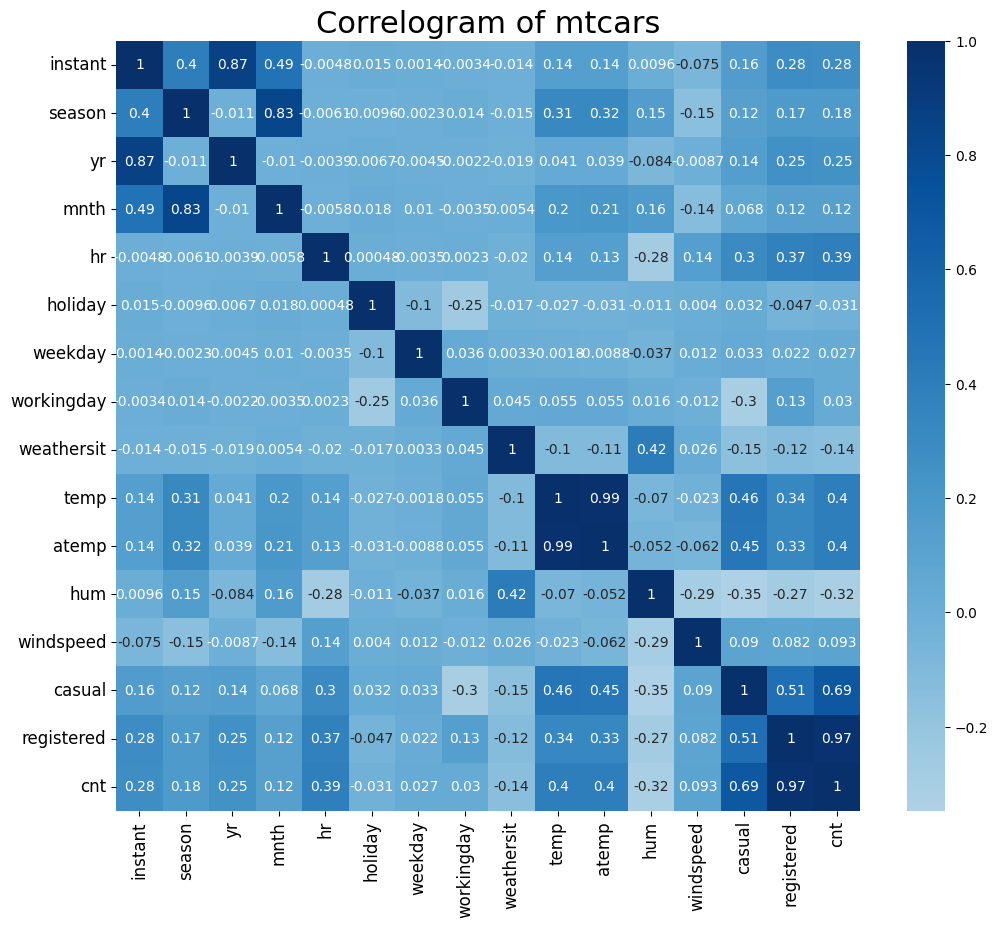

In [31]:
# Матрица корреляций
plt.figure(figsize=(12,10))

corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, xticklabels=df.corr(numeric_only=True).columns, yticklabels=df.corr(numeric_only=True).columns, cmap='Blues', center=0, annot=True)

plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [83]:
# выделим вектор признаков без колонок casual, registered, instant и dteday
# X = df.iloc[:,2:-3].values

X = df[['mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp',	'hum', 'windspeed']].values

# одномерный вектор целевой переменной cnt = casual + registered
Y = df.iloc[:,-1].values

print(X)

[[ 1.      0.      0.     ...  0.2879  0.81    0.    ]
 [ 1.      1.      0.     ...  0.2727  0.8     0.    ]
 [ 1.      2.      0.     ...  0.2727  0.8     0.    ]
 ...
 [12.     21.      0.     ...  0.2576  0.6     0.1642]
 [12.     22.      0.     ...  0.2727  0.56    0.1343]
 [12.     23.      0.     ...  0.2727  0.65    0.1343]]


In [84]:
# Нормализация
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
X_norm = mmsc.fit_transform(X)
print(X_norm)

[[0.         0.         0.         ... 0.2879     0.81       0.        ]
 [0.         0.04347826 0.         ... 0.2727     0.8        0.        ]
 [0.         0.08695652 0.         ... 0.2727     0.8        0.        ]
 ...
 [1.         0.91304348 0.         ... 0.2576     0.6        0.19301751]
 [1.         0.95652174 0.         ... 0.2727     0.56       0.15786999]
 [1.         1.         0.         ... 0.2727     0.65       0.15786999]]


In [94]:
# Разделение данных
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.3)

In [95]:
# Создание модели линейной регрессии
lig_reg = LinearRegression()

lig_reg

# fit() - обучение модели -> вычисление оптиальных весов
lig_reg.fit(X_train, y_train)

print('Веса всех признаков (wi): ', lig_reg.coef_)
print('Свободный коэффицент уравнения w0:', lig_reg.intercept_)

Веса всех признаков (wi):  [  54.60343492  170.99188537  -17.56793556   10.1949945     2.02910976
   -2.33012856  347.18787701 -229.2702094    26.52237478]
Свободный коэффицент уравнения w0: 42.75479356606394


In [96]:
# Предсказание
y_pred = lig_reg.predict(X_test)

# Сравнение с тестами
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 110.17178915138048
Mean Squared Error: 22441.06272162383
R2 score: 0.3231136497868955
